In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import torch.autograd as autograd   

import torch
import pandas as pd

from scipy.interpolate import LinearNDInterpolator
device1 = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
device2 = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

print("Device 1: ",device1)
print("Device 2: ",device2)

Device 1:  cuda:2
Device 2:  cuda:3


In [2]:
folder_main = '/home/smartlab/Documents/jupyterNB/raghav/Projects_git_summer2024/PINN_AFSD/Code/'
filename = 'AFSD_Exp_1mm_300.pt'
data_filename = 'Exponential_300_2mms.mat'

R0 = 5 #mm 5.34
Rs = 19 #mm
mu_vis = 0.3 
mu = 0.3 #Friction Coefficient (not viscosity)
delta = 0.5
A = 6.41 #For slip factor
pi = np.pi
Omega = 300 #rpm
V = 2 #mm/s
F = 0.67 #mm
rho = 2700 * 1e-6 #g/mm3
k_B = 1.380649*1e-23 #J/K
R = 8.314 #J/(K.mol)
E_a = 205000 #J/mol #Q
alpha_sig = 52 #mm^2/N
# A = np.exp(27.78)
log_A = 27.78
n = 3.49
k = 0.167 #Thermal Conductivity #W/(mmK)
c_p = 0.897 #J/gK 
alpha_m = k/(rho*c_p)
T_a = 298.0


k_t = 0.0176 #W/(mmK)
c_p_t = 0.46 #J/gk
rho_t = 2700 * 1e-6 #g/mm3
alpha_t = k_t/(rho_t*c_p_t)

h_sides = 5*1e-6 #W/mm^2K
C_bot = 0.15*1e-6 #W/mm^2K^3

eeta = alpha_m/(alpha_m+alpha_t)

lb_xyz_uvw = np.array([-20.0,-20.0,-1.0])
ub_xyz_uvw = np.array([20.0,20.0,0.0])


lb_xyz = np.array([-20.0,-20.0,-1.0])
ub_xyz = np.array([20.0,20.0,0.0])



In [3]:
data_exp = pd.read_excel("experimental_data_2D(17x30).xlsx",sheet_name=0,header = 0)
data_exp_300_2mms = pd.DataFrame.to_numpy(data_exp)

In [17]:
data_exp

,Unnamed: 0,Trial1: processing condition 900rpm;1mm/s,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Trial2:processing condition 900rpm;2mm/s,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Trial5:processing condition 300rpm;1mm/s,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Trial6:processing condition 300rpm;2mm/s,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,point1,737.00,733.183254,731.456343,728.573776,725.942571,742.00,739.817977,738.280583,733.083439,...,647.000000,642.294779,642.942933,640.553703,641.315930,632.000000,629.461400,624.481384,623.279922,622.865430
1,point2,752.09,752.654955,750.104666,745.809456,746.882161,753.05,747.621292,743.380614,739.631738,...,662.771901,661.983077,659.678532,655.316495,654.424523,648.729849,645.132732,644.033949,642.587078,641.015940
2,point3,768.00,764.492332,758.849977,754.044768,751.386167,773.00,769.547040,769.646077,768.337250,...,684.000000,681.165166,680.882275,681.451221,680.348766,660.000000,657.125907,655.306384,652.141111,649.210873
3,point4,781.57,773.626642,768.100630,764.602239,761.565540,788.18,781.809464,781.609265,773.887468,...,703.684254,703.380922,700.508961,701.972918,702.378792,672.273148,669.050498,667.976473,668.576889,667.320048
4,point5,800.00,790.635459,784.198595,778.791634,775.185919,802.00,797.873161,794.740702,789.312271,...,713.000000,710.253099,709.109940,708.643037,706.994785,685.000000,682.796213,682.174965,680.037390,675.940660
5,point6,812.82,804.910613,798.486229,788.764499,784.359761,810.92,805.106541,799.850609,793.145197,...,728.144505,728.766060,728.198004,727.265739,723.652001,689.875918,684.956384,683.571507,685.227715,680.690521
6,point7,836.00,823.936881,814.708538,805.120954,798.277658,828.00,821.921438,813.095600,805.864125,...,747.000000,747.031874,743.405500,744.146911,743.824300,700.000000,700.535304,701.974287,701.034271,700.464902
7,point8,857.40,842.444570,834.266206,825.083803,821.291471,844.86,838.425671,830.287829,824.818644,...,749.050383,746.280890,743.490137,742.455947,740.962329,706.226413,705.301526,708.384766,706.054327,700.715732
8,point9,867.00,850.285937,836.464687,829.253464,823.062038,847.00,839.188262,833.190809,827.609866,...,751.000000,747.688941,747.669848,749.819572,748.827496,707.000000,706.680895,706.281967,703.533620,699.166414
9,point10,863.76,850.968241,839.807336,835.749005,833.154388,835.18,832.235098,823.385443,809.956929,...,748.724026,748.336541,746.792594,745.964881,746.943477,705.072096,701.909692,702.203988,698.870840,691.487325


In [4]:
data_exp_300_2mms[:,-5:].shape

(17, 5)

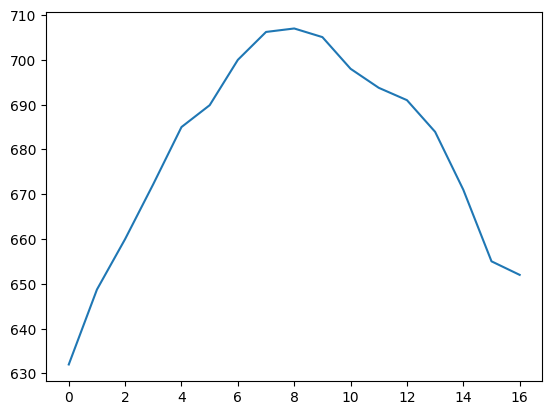

In [5]:
plt.plot(data_exp_300_2mms[:,26])

In [6]:
from Seq_Model_Parallel import coupled_PINN

layers1 = np.array([3,50,50,50,4]) #9 hidden layers
layers2 = np.array([3,50,50,50,1]) #9 hidden layers
# layers = np.array([3,50,50,50,5])
# layers = np.array([3,64,64,64,1])
model_PINN = coupled_PINN(layers1,layers2,device1,device2,lb_xyz,ub_xyz)

model_PINN.load_state_dict(torch.load(folder_main + filename))

#Testing with FVM data
fvm_data = loadmat('/home/smartlab/Documents/jupyterNB/raghav/Projects_git_summer2024/Data/AFSD_Nikhil/' + data_filename)

u_fvm = fvm_data['u_star']
v_fvm = fvm_data['v_star']
w_fvm = fvm_data['w_star']

u_fvm = (u_fvm[0:-1,:,:] + u_fvm[1:,:,:])/2
v_fvm = (v_fvm[:,0:-1,:] + v_fvm[:,1:,:])/2
w_fvm = (w_fvm[:,:,0:-1] + w_fvm[:,:,1:])/2


Res_v_fvm = np.sqrt(np.square(u_fvm) + np.square(v_fvm) + np.square(w_fvm))
T_fvm = fvm_data['T']
sigma_e_fvm = fvm_data['effectivestress']
eps_e_fvm = fvm_data['effstrrate']
mu_vis_fvm = fvm_data['mu']

Sequentialmodel(
  (activation): Tanh()
  (linears): ModuleList(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1-2): 2 x Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=4, bias=True)
  )
)
Sequentialmodel(
  (activation): Tanh()
  (linears): ModuleList(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1-2): 2 x Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=1, bias=True)
  )
)


/home/smartlab/anaconda3/envs/raghav/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [7]:
[x_min,y_min,z_min] = lb_xyz
[x_max,y_max,z_max] = ub_xyz

# x_min = -20.0
# x_max = 20.0

# x = np.linspace(x_min,x_max,250)
x = np.linspace(x_min,x_max,251)
x = (x[0:-1] + x[1:]).reshape(-1,1)/2
y = np.linspace(y_min,y_max,101)
y = (y[0:-1] + y[1:]).reshape(-1,1)/2
z = np.linspace(z_min,z_max,13)
z = (z[0:-1] + z[1:]).reshape(-1,1)/2

X,Y,Z = np.meshgrid(x,y,z)

X = X.flatten('F').reshape(-1,1)
Y = Y.flatten('F').reshape(-1,1)
Z = Z.flatten('F').reshape(-1,1)

xyz = np.hstack((X,Y,Z))
xyz_test_tensor = torch.from_numpy(xyz).float().to(device1)

uvwp = model_PINN.PINN_uvw.forward(xyz_test_tensor).cpu().detach().numpy()

Res_v_PINN = np.sqrt(np.square(uvwp[:,0])+np.square(uvwp[:,1])+np.square(uvwp[:,2]))

In [8]:
x = np.linspace(x_min,x_max,251)
x = (x[0:-1] + x[1:]).reshape(-1,1)/2
y = np.linspace(y_min,y_max,101)
y = (y[0:-1] + y[1:]).reshape(-1,1)/2
z = np.linspace(z_min,z_max,13)
z = (z[0:-1] + z[1:]).reshape(-1,1)/2

In [9]:
g = xyz_test_tensor.clone()
g.requires_grad = True

out_full = model_PINN.PINN_uvw.forward(g.to(device1)).cpu() 
u = out_full[:,0:1]
v = out_full[:,1:2]
w = out_full[:,2:3]
p = out_full[:,3:4]


# print(T.shape)
T = model_PINN.PINN_T.forward(g.to(device2)).cpu()

# p_xyz = autograd.grad(p,g,torch.ones([xyz_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
u_xyz = autograd.grad(u,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
v_xyz = autograd.grad(v,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
w_xyz = autograd.grad(w,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()

eps2_11 = torch.square(1/2*(2*u_xyz[:,0]))
eps2_12 = torch.square(1/2*(u_xyz[:,1] + v_xyz[:,0]))
eps2_13 = torch.square(1/2*(u_xyz[:,2] + w_xyz[:,0]))

eps2_21 = eps2_12
eps2_22 = torch.square(1/2*(2*v_xyz[:,1])) 
eps2_23 = torch.square(1/2*(v_xyz[:,2] + w_xyz[:,1]))

eps2_31 = eps2_13
eps2_32 = eps2_23 
eps2_33 = torch.square(1/2*(2*w_xyz[:,2]))

eps_e = torch.sqrt((2/3)*(eps2_11 + eps2_12 + eps2_13 + eps2_21 + eps2_22 + eps2_23 + eps2_31 + eps2_32 + eps2_33)).reshape(-1,1)


# Z = eps_e*torch.exp(E_a/(R*T))
# log_Z = torch.log(eps_e) + E_a/(R*T)
log_Z = torch.log(eps_e) + E_a/(R*T) #Simplification


W = (log_Z - log_A)/n



# sigma_e =  (1/alpha_sig)*torch.asinh(W) 
sigma_e = (1/alpha_sig)*(np.log(2)/n + W) #Approximation

#____________________________#
mu_vis = sigma_e/(3*eps_e)

T = T.cpu().detach().numpy()
eps_e = eps_e.cpu().detach().numpy()
sigma_e = sigma_e.cpu().detach().numpy()
mu_vis = mu_vis.cpu().detach().numpy()



In [10]:
def RMSE(a,b):
    return np.sqrt(np.mean(np.square(a-b)))

def RE(a_true,a):
    return np.linalg.norm((a_true-a).reshape(-1,),2)/np.linalg.norm(a_true.reshape(-1,),2)

def corr(a,b):
    return np.corrcoef(a.reshape(-1,),b.reshape(-1,))[0,1]


def correct_shape(a):
    a = a.reshape(12,250,100,order = 'C')
    return np.swapaxes(np.swapaxes(a,0,1),1,2)

def print_metrics(a,b,name):
    print(name+" :","RMSE ",RMSE(a.reshape(-1,),b.reshape(-1,)))
    print(name+" :","RE ", RE(a.reshape(-1,),b.reshape(-1,)))
    print(name+" :","Corr ", corr(a.reshape(-1,),b.reshape(-1,)))


T = correct_shape(T)
eps_e = correct_shape(eps_e)
sigma_e = correct_shape(sigma_e)
mu_vis = correct_shape(mu_vis)
Res_v_PINN = correct_shape(Res_v_PINN)
# mu_vis = correct_shape(mu_vis)

In [11]:
print_metrics(T_fvm,T,"T")
print_metrics(eps_e_fvm,eps_e,"Eps")
print_metrics(sigma_e_fvm,sigma_e,"Sigma")
print_metrics(Res_v_fvm,Res_v_PINN/1000,"Res V")
print_metrics(mu_vis_fvm,mu_vis,"Mu Vis")

T : RMSE  174.19999670508082
T : RE  0.3221595287447262
T : Corr  0.020512065685115006
Eps : RMSE  46.782313776909085
Eps : RE  8.071443962732717
Eps : Corr  0.6748982925352953
Sigma : RMSE  85860637.1243664
Sigma : RE  0.9999999991803828
Sigma : Corr  0.14743055841254685
Res V : RMSE  0.01259756208046256
Res V : RE  0.9871421543436784
Res V : Corr  0.7318340578999778
Mu Vis : RMSE  81857949655.93553
Mu Vis : RE  0.9999999999999272
Mu Vis : Corr  0.29284275342243776


In [12]:
# PLOTTING
[x_min,y_min,z_min] = lb_xyz
[x_max,y_max,z_max] = ub_xyz

x_min = -8.0
x_max = 8.0



x = np.linspace(x_min,x_max,17).reshape(-1,1)
# y = np.linspace(y_min,y_max,200).reshape(-1,1)
y = 20.0
z = np.linspace(z_min,z_max,5).reshape(-1,1)
# z = -0.4
X,Y,Z = np.meshgrid(x,y,z)

X = X.flatten('F').reshape(-1,1)
Y = Y.flatten('F').reshape(-1,1)
Z = Z.flatten('F').reshape(-1,1)

xyz = np.hstack((X,Y,Z))
xyz_test_tensor = torch.from_numpy(xyz).float().to(device1)

uvwp = model_PINN.PINN_uvw.forward(xyz_test_tensor).cpu().detach().numpy()
T = model_PINN.PINN_T.forward(xyz_test_tensor.to(device2)).cpu().detach().numpy()

In [13]:
T = T.reshape(5,17)

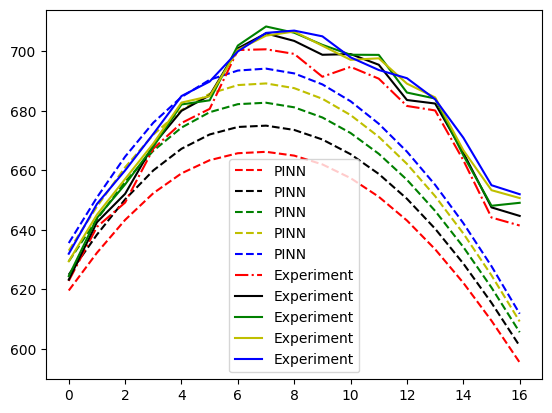

In [14]:
p_base = 26
fig,ax = plt.subplots()
ax.plot(np.flip(T[0,:]),'r--',label='PINN')
ax.plot(np.flip(T[1,:]),'k--',label='PINN')
ax.plot(np.flip(T[2,:]),'g--',label='PINN')
ax.plot(np.flip(T[3,:]),'y--',label='PINN')
ax.plot(np.flip(T[4,:]),'b--',label='PINN')



ax.plot(data_exp_300_2mms[:,p_base+4],'r-.',label = 'Experiment')
ax.plot(data_exp_300_2mms[:,p_base+3],'k',label = 'Experiment')
ax.plot(data_exp_300_2mms[:,p_base+2],'g',label = 'Experiment')
ax.plot(data_exp_300_2mms[:,p_base+1],'y',label = 'Experiment')
ax.plot(data_exp_300_2mms[:,p_base],'b',label = 'Experiment')
ax.legend()

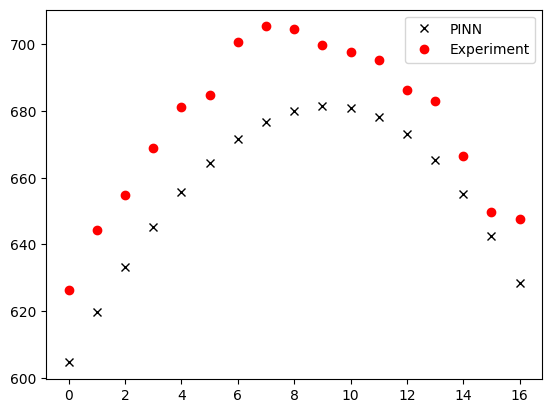

In [15]:
p_base = 26
fig,ax = plt.subplots()
ax.plot(np.mean(T,axis = 0),'kx',label='PINN')
ax.plot(np.mean(data_exp_300_2mms[:,p_base:p_base+5],axis = 1),'ro',label = 'Experiment')



# ax.plot(data_exp_300_2mms[:,p_base+4],'r-.',label = 'Experiment')
# ax.plot(data_exp_300_2mms[:,p_base+3],'k',label = 'Experiment')
# ax.plot(data_exp_300_2mms[:,p_base+2],'g',label = 'Experiment')
# ax.plot(data_exp_300_2mms[:,p_base+1],'y',label = 'Experiment')
# ax.plot(data_exp_300_2mms[:,p_base],'b',label = 'Experiment')
ax.legend()

In [66]:
#Tracing Points
xyz_start = np.array([0.0,0.0,-0.01])

n_timesteps = 2000




xyz_trace = np.zeros((n_timesteps+1,3))
eps_e_trace = np.zeros((n_timesteps))

xyz_trace[0] = xyz_start 
xyz = xyz_trace[0]

for t in range(n_timesteps):
    xyz_tensor = torch.from_numpy(xyz).float().to(device1)
    uvwp = model_PINN.PINN_uvw.forward(xyz_tensor).cpu().detach().numpy()

    dx = uvwp[0]/10000.0
    dy = uvwp[1]/10000.0
    dz = uvwp[2]/10000.0
    
    xyz = xyz + np.array([dx,dy,dz])


    g = xyz_tensor.reshape(1,-1).clone()
    g.requires_grad = True

    out_full = model_PINN.PINN_uvw.forward(g.to(device1)).cpu() 
    u = out_full[:,0:1]
    v = out_full[:,1:2]
    w = out_full[:,2:3]
    p = out_full[:,3:4]


    # print(T.shape)
    T = model_PINN.PINN_T.forward(g.to(device2)).cpu()

    # print(u.shape)
    [ront]

    # p_xyz = autograd.grad(p,g,torch.ones([xyz_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
    u_xyz = autograd.grad(u,g,torch.ones([g.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
    v_xyz = autograd.grad(v,g,torch.ones([g.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
    w_xyz = autograd.grad(w,g,torch.ones([g.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()

    eps2_11 = torch.square(1/2*(2*u_xyz[:,0]))
    eps2_12 = torch.square(1/2*(u_xyz[:,1] + v_xyz[:,0]))
    eps2_13 = torch.square(1/2*(u_xyz[:,2] + w_xyz[:,0]))

    eps2_21 = eps2_12
    eps2_22 = torch.square(1/2*(2*v_xyz[:,1])) 
    eps2_23 = torch.square(1/2*(v_xyz[:,2] + w_xyz[:,1]))

    eps2_31 = eps2_13
    eps2_32 = eps2_23 
    eps2_33 = torch.square(1/2*(2*w_xyz[:,2]))

    eps_e = torch.sqrt((2/3)*(eps2_11 + eps2_12 + eps2_13 + eps2_21 + eps2_22 + eps2_23 + eps2_31 + eps2_32 + eps2_33)).reshape(-1,1)

    eps_e_trace[t] = eps_e

    xyz_trace[t+1,:] = xyz

KeyboardInterrupt: 

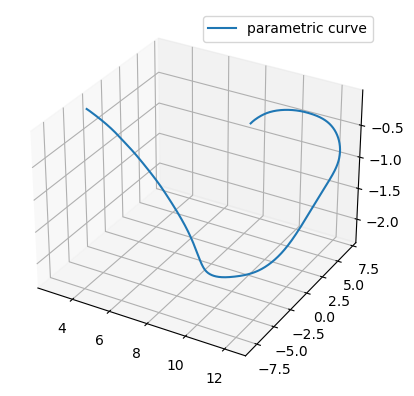

In [162]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xyz_trace[:,0], xyz_trace[:,1], xyz_trace[:,2], label='parametric curve')
ax.legend()

plt.show()

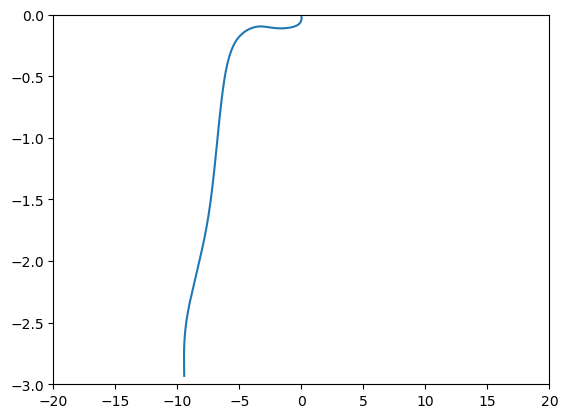

In [166]:
fig,ax = plt.subplots()
ax.plot(xyz_trace[:,0], xyz_trace[:,2], label='parametric curve')
ax.set_xlim([-20,20])
ax.set_ylim([-3.0,0.0])
# ax.set_ylim([-20,20])
# ax.legend()

plt.show()

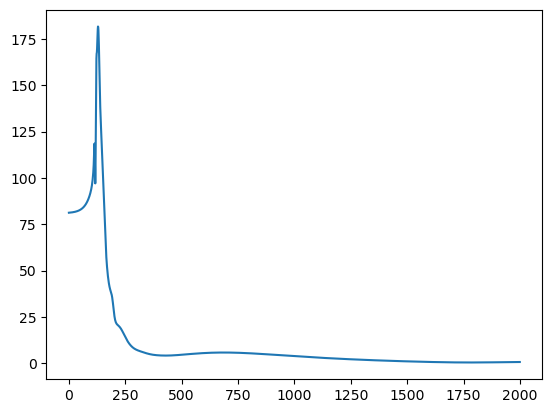

In [167]:
plt.plot(eps_e_trace)

In [154]:
z.shape

(100,)

In [155]:
# g = xyz_test_tensor.clone()
# g.requires_grad = True

# out_full = model_PINN.PINN_uvw.forward(g.to(device1)).cpu() 
# u = out_full[:,0:1]
# v = out_full[:,1:2]
# w = out_full[:,2:3]
# p = out_full[:,3:4]


# # print(T.shape)
# T = model_PINN.PINN_T.forward(g.to(device2)).cpu()

# # p_xyz = autograd.grad(p,g,torch.ones([xyz_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
# u_xyz = autograd.grad(u,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
# v_xyz = autograd.grad(v,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
# w_xyz = autograd.grad(w,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()

# eps2_11 = torch.square(1/2*(2*u_xyz[:,0]))
# eps2_12 = torch.square(1/2*(u_xyz[:,1] + v_xyz[:,0]))
# eps2_13 = torch.square(1/2*(u_xyz[:,2] + w_xyz[:,0]))

# eps2_21 = eps2_12
# eps2_22 = torch.square(1/2*(2*v_xyz[:,1])) 
# eps2_23 = torch.square(1/2*(v_xyz[:,2] + w_xyz[:,1]))

# eps2_31 = eps2_13
# eps2_32 = eps2_23 
# eps2_33 = torch.square(1/2*(2*w_xyz[:,2]))

# eps_e = torch.sqrt((2/3)*(eps2_11 + eps2_12 + eps2_13 + eps2_21 + eps2_22 + eps2_23 + eps2_31 + eps2_32 + eps2_33)).reshape(-1,1)


# # Z = eps_e*torch.exp(E_a/(R*T))
# # log_Z = torch.log(eps_e) + E_a/(R*T)
# log_Z = torch.log(eps_e) + E_a/(R*T) #Simplification


# W = (log_Z - log_A)/n



# # sigma_e =  (1/alpha_sig)*torch.asinh(W) 
# sigma_e = (1/alpha_sig)*(np.log(2)/n + W) #Approximation

# #____________________________#
# mu_vis = sigma_e/(3*eps_e)

# T = T.cpu().detach().numpy()
# eps_e = eps_e.cpu().detach().numpy()
# sigma_e = sigma_e.cpu().detach().numpy()
# mu_vis = mu_vis.cpu().detach().numpy()

ValueError: cannot reshape array of size 10000 into shape (200,200)

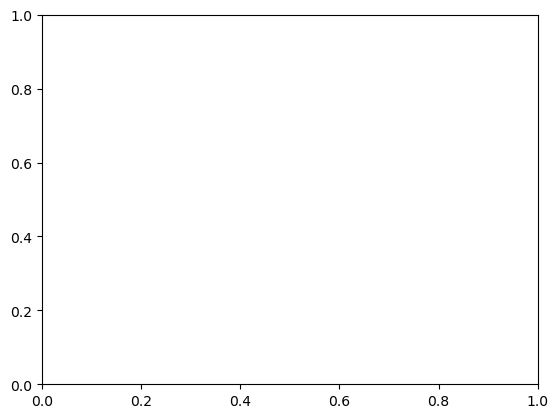

In [20]:
r_vel = np.sqrt(np.square(uvwp[:,0])+np.square(uvwp[:,1])+np.square(uvwp[:,2]))
# r_vel = np.sqrt(np.square(uvwp[:,2]))
# r_vel = uvwp[:,2]
fig,ax = plt.subplots()
im = ax.imshow((r_vel/1000).reshape(200,200),cmap = 'jet',extent = [-20,20,-20,20],vmax = 0.15,vmin = 0)
fig.colorbar(im)
ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('Res_vel_PureSlip.svg',format = 'svg',bbox_inches = 'tight')

Text(0, 0.5, '$y$ (mm)')

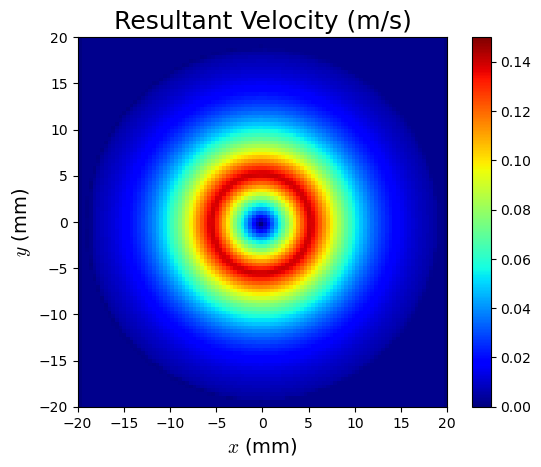

In [21]:
#FVM Plot
fig,ax = plt.subplots()
im = ax.imshow(Res_v_fvm[75:175,:,-1],cmap = 'jet',extent = [-20,20,-20,20],vmax = 0.15,vmin = 0)
fig.colorbar(im)
ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('FVM_Res_vel_Exp_xy.svg',format = 'svg',bbox_inches = 'tight')

Text(0, 0.5, '$z$ (mm)')

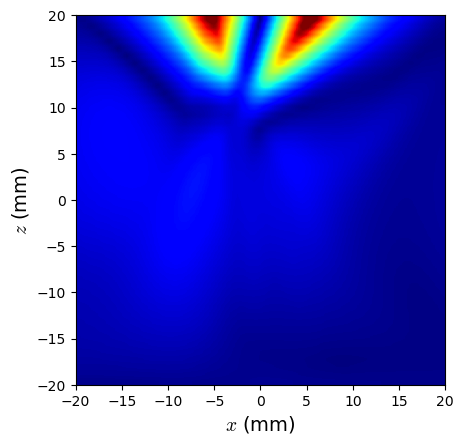

In [23]:
r_vel = np.sqrt(np.square(uvwp[:,0])+np.square(uvwp[:,1])+np.square(uvwp[:,2]))
# r_vel = np.sqrt(np.square(uvwp[:,2]))
# r_vel = uvwp[:,2]
fig,ax = plt.subplots()
im = ax.imshow((np.flip(r_vel)/1000).reshape(50,200),cmap = 'jet',extent = [-20,20,-3,0],vmax = 0.15,vmin = 0)
# fig.colorbar(im)
# ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('Res_vel_PureSlip_xz.svg',format = 'svg',bbox_inches = 'tight')

Text(0, 0.5, '$z$ (mm)')

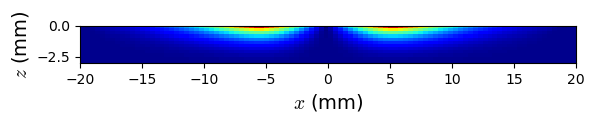

In [24]:
#FVM
fig,ax = plt.subplots()
im = ax.imshow(np.flip(np.transpose(Res_v_fvm[75:175,49,:])),cmap = 'jet',extent = [-20,20,-3,0],vmax = 0.15,vmin = 0)
# fig.colorbar(im)
# ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('FVM_Res_vel_Exp_xz.svg',format = 'svg',bbox_inches = 'tight')

In [25]:
g = xyz_test_tensor.clone()
g.requires_grad = True

out_full = model_PINN.PINN_uvw.forward(g.to(device1)).cpu() 
u = out_full[:,0:1]
v = out_full[:,1:2]
w = out_full[:,2:3]
p = out_full[:,3:4]


# print(T.shape)
T = model_PINN.PINN_T.forward(g.to(device2)).cpu()

# p_xyz = autograd.grad(p,g,torch.ones([xyz_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
u_xyz = autograd.grad(u,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
v_xyz = autograd.grad(v,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()
w_xyz = autograd.grad(w,g,torch.ones([xyz_test_tensor.shape[0], 1]).to('cpu'),retain_graph=True,allow_unused = True)[0].cpu()

eps2_11 = torch.square(1/2*(2*u_xyz[:,0]))
eps2_12 = torch.square(1/2*(u_xyz[:,1] + v_xyz[:,0]))
eps2_13 = torch.square(1/2*(u_xyz[:,2] + w_xyz[:,0]))

eps2_21 = eps2_12
eps2_22 = torch.square(1/2*(2*v_xyz[:,1])) 
eps2_23 = torch.square(1/2*(v_xyz[:,2] + w_xyz[:,1]))

eps2_31 = eps2_13
eps2_32 = eps2_23 
eps2_33 = torch.square(1/2*(2*w_xyz[:,2]))

eps_e = torch.sqrt((2/3)*(eps2_11 + eps2_12 + eps2_13 + eps2_21 + eps2_22 + eps2_23 + eps2_31 + eps2_32 + eps2_33)).reshape(-1,1)


# Z = eps_e*torch.exp(E_a/(R*T))
# log_Z = torch.log(eps_e) + E_a/(R*T)
log_Z = torch.log(eps_e) + E_a/(R*T) #Simplification


W = (log_Z - log_A)/n



# sigma_e =  (1/alpha_sig)*torch.asinh(W) 
sigma_e = (1/alpha_sig)*(np.log(2)/n + W) #Approximation

#____________________________#
mu_vis = sigma_e/(3*eps_e)


eps_e = eps_e.cpu().detach().numpy()
sigma_e = sigma_e.cpu().detach().numpy()
mu_vis = mu_vis.cpu().detach().numpy()


ValueError: cannot reshape array of size 10000 into shape (200,200)

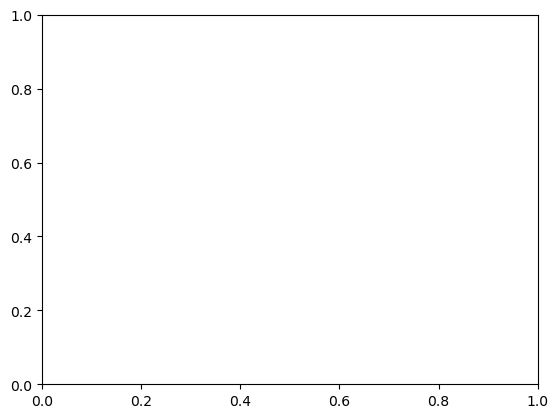

In [26]:
fig,ax = plt.subplots()
im = ax.imshow(T.cpu().detach().numpy().reshape(200,200),cmap = 'jet',extent = [-20,20,-20,20],vmax = 800,vmin = 300)
fig.colorbar(im)
ax.set_title('Temperature (K)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('Temp_xy_Proposal.svg',format = 'svg',bbox_inches = 't

ValueError: cannot reshape array of size 10000 into shape (200,200)

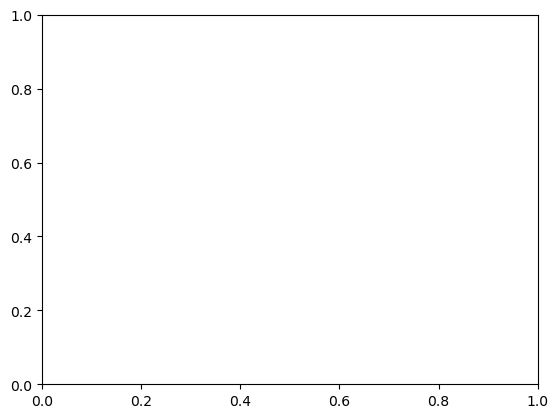

In [27]:
fig,ax = plt.subplots()
im = ax.imshow((eps_e/2).reshape(200,200),cmap = 'viridis',extent = [-20,20,-20,20],vmax = 80,vmin = 0)
fig.colorbar(im)
ax.set_title('Effective Strain Rate ($s^{-1}$)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('Eps_xy_QSR.svg',format = 'svg',bbox_inches = 'tight')

Text(0, 0.5, '$z$ (mm)')

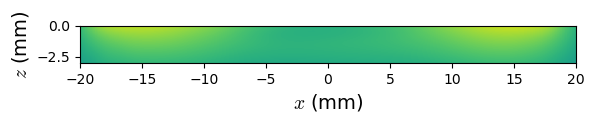

In [31]:
fig,ax = plt.subplots()
im = ax.imshow(np.flip(T.cpu().detach().numpy().reshape(50,200)),cmap = 'viridis',extent = [-20,20,-3,0],vmax = 800,vmin = 300)
# fig.colorbar(im)
# ax.set_title('Temperature (K)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)
# plt.savefig('Eps_xz_QSR.svg',format = 'svg',bbox_inches = 'tight')

tensor([763.8500], grad_fn=<UnbindBackward0>)

In [ ]:
fig,ax = plt.subplots()
im = ax.imshow(np.flip(eps_e.cpu().detach().numpy().reshape(50,200)),cmap = 'jet',extent = [-20,20,-3,0],vmax = 800,vmin = 300)
# fig.colorbar(im)
# ax.set_title('Effective Strain Rate ($s^{-1}$)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)

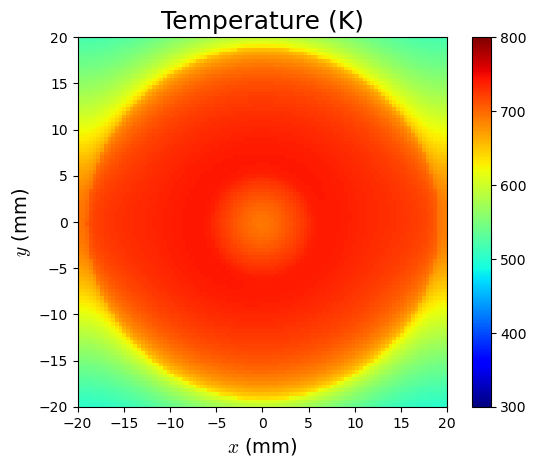

In [33]:
#FVM Plot
fig,ax = plt.subplots()
im = ax.imshow(T_fvm[75:175,:,-1],cmap = 'jet',extent = [-20,20,-20,20],vmax = 800,vmin = 300)
fig.colorbar(im)
ax.set_title('Temperature (K)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
plt.savefig('FVM_T_Exp_xy.svg',format = 'svg',bbox_inches = 'tight')

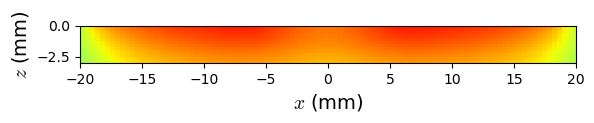

In [29]:
fig,ax = plt.subplots()
im = ax.imshow(np.flip(np.transpose(T_fvm[75:175,49,:])),cmap = 'jet',extent = [-20,20,-3,0],vmax = 800,vmin = 300)
# fig.colorbar(im)
# ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)
plt.savefig('FVM_T_Exp_xz.svg',format = 'svg',bbox_inches = 'tight')

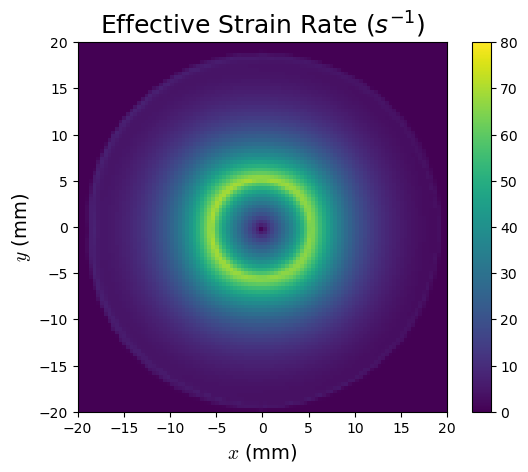

In [77]:
#FVM Plot
fig,ax = plt.subplots()
im = ax.imshow(eps_e_fvm[75:175,:,-1],cmap = 'viridis',extent = [-20,20,-20,20],vmax = 80,vmin = 0)
fig.colorbar(im)
ax.set_title('Effective Strain Rate ($s^{-1}$)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$y$ (mm)',math_fontfamily = 'cm',fontsize = 14)
plt.savefig('FVM_eps_Exp_xy.svg',format = 'svg',bbox_inches = 'tight')

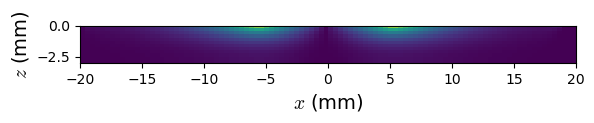

In [78]:
fig,ax = plt.subplots()
im = ax.imshow(np.flip(np.transpose(eps_e_fvm[75:175,49,:])),cmap = 'viridis',extent = [-20,20,-3,0],vmax = 80,vmin = 0)
# fig.colorbar(im)
# ax.set_title('Resultant Velocity (m/s)',fontsize = 18)
ax.set_xlabel('$x$ (mm)',math_fontfamily = 'cm',fontsize = 14)
ax.set_ylabel('$z$ (mm)',math_fontfamily = 'cm',fontsize = 14)
plt.savefig('FVM_eps_Exp_xz.svg',format = 'svg',bbox_inches = 'tight')